# Assignment 3

This assignment will begin a more open-ended approach to developing machine learning models. Rather than perform analyses and processing steps in a strict question/answer format, you are largely free to do whatever you think is needed in this assignment. Be sure to justify these choices with comments so that I can follow your logic. Refer to some of the previous notebooks to get a sense of the steps.

In [1]:
import pandas as pd
import numpy as np
admission_data = pd.read_csv('ucla_grad_data.csv')

# Processing (5 Points)

## Turn Into Binary Classification Problem (1 Point)
This dataset has a column with the chance to gain admission into graduate school at UCLA. Change this to 1 and 0, where 1 is greater than or equal to .85. We will assume there is a high level of confidence that these individuals will be admitted and anything below this level, while still possibly leading to admission, will be rejections. As a result, the goal here is to understand the factors that make admission highly likely and build predictive models to help students understand their chances and how to improve their applications.

In [2]:
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dependent_var = admission_data["Chance of Admit"]
print(dependent_var)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64


In [4]:
dependent_binary = [int(p>=0.85) for p in dependent_var]
dependent_binary_df = pd.DataFrame(dependent_binary, columns = ["Admit?"])
dependent_binary_df

,Admit?
0,1
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,1
398,0


In [5]:
#for row in admission_data["Chance of Admit"].iteritems():
#    if admission_data[row, 8] >= .85: admission_data[row, 8] == 1
#    else: admission_data[row, 8] == 0

#Experementing with different loops interating through each row of the column 

In [6]:
#I want to see the distribution of our dependent variable 
dependent_binary_df.value_counts()

Admit?
0         311
1          89
dtype: int64

In [7]:
#Since Serial No. acts basically like an index, I am going to drop the feature 
#as it will not provide any real use in our models.
ad_data = pd.concat([admission_data, dependent_binary_df], axis = 1)
admission_data_binary = ad_data.drop(columns=["Chance of Admit","Serial No."])
print(admission_data_binary)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Admit?  
0         1  
1         0  
2         0  
3         0  
4    

### Other Processing

In [8]:
# ... now whatever you want to do to process the data and/or need to do to properly evaluate machine learning models
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
admission_data_binary.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit?               0
dtype: int64

In [10]:
admission_data_binary.describe()
#We can check basic stats as well as see if we have any missing data.
#We can see we have no missing data to impute

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit?
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.222500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.416446
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


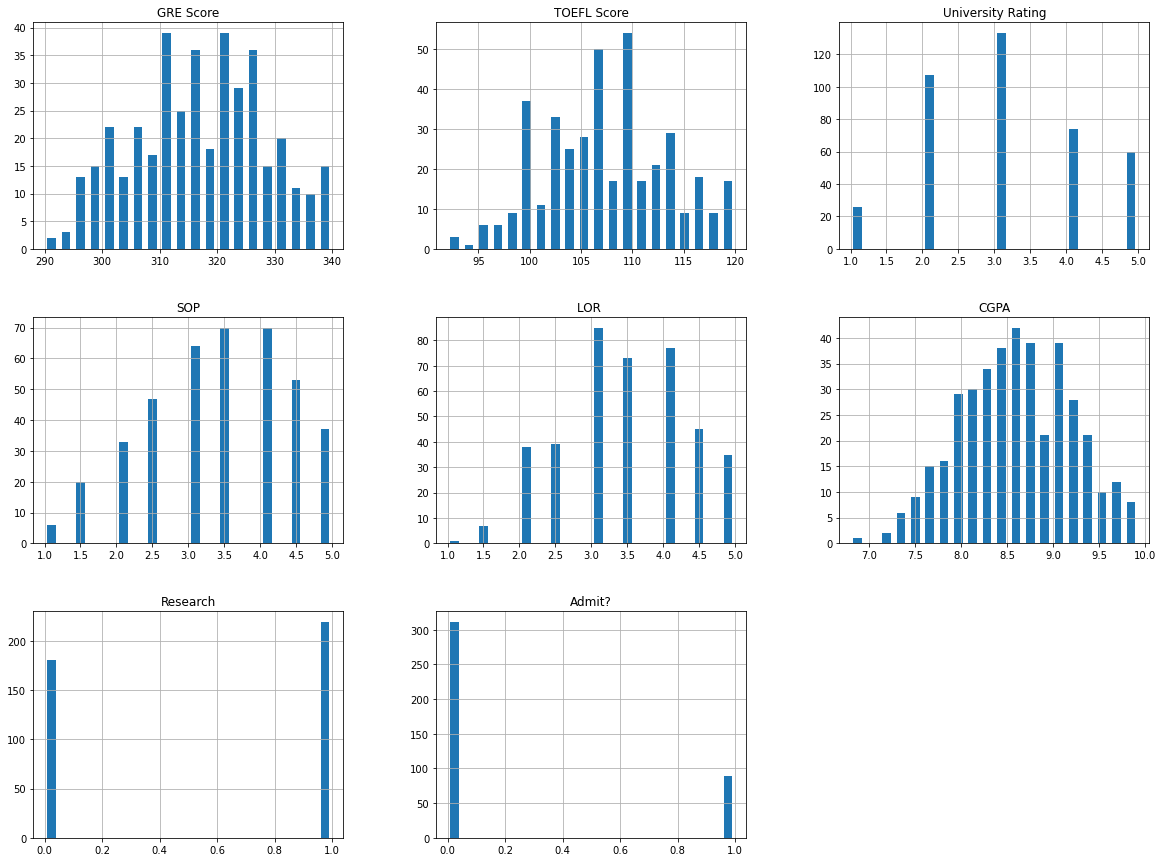

In [11]:
#checking the distribution of the data. 
%matplotlib inline
import matplotlib.pyplot as plt
admission_data_binary.hist(bins = 20, figsize=(20,15), rwidth = .6)
plt.show()


In [12]:
#Checking skew
num_cols = list(admission_data_binary.select_dtypes(np.number).columns)
for col in num_cols:
    print(admission_data_binary[col].skew())

-0.0628934593601882
0.05721591369844269
0.17126027744362737
-0.27576116806333434
-0.10699147866617165
-0.06599054377889167
-0.19158240605436225
1.3394026321074384


## The relevent numerical data features distributions appears to be relatively normal so I do not believe we need to transform our data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
y = admission_data_binary["Admit?"]
X = admission_data_binary.drop(columns = ["Admit?"])


In [15]:
#Splitting our data into training and testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)

In [16]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

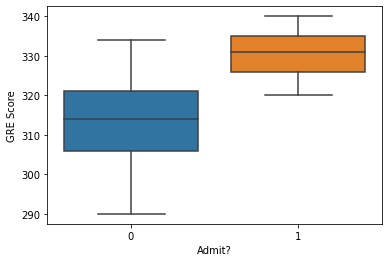

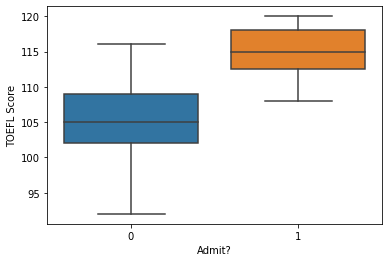

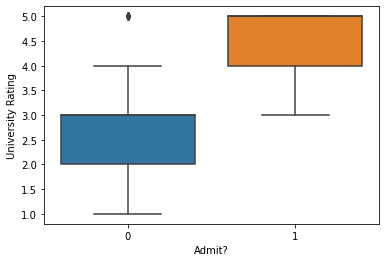

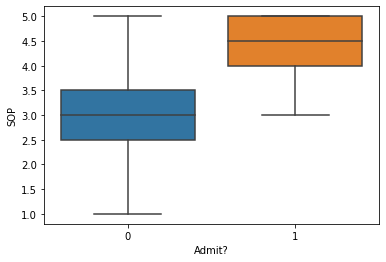

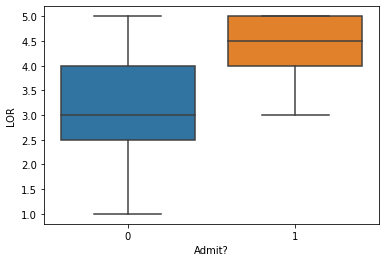

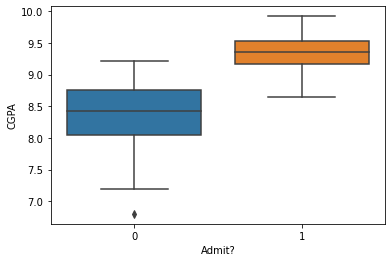

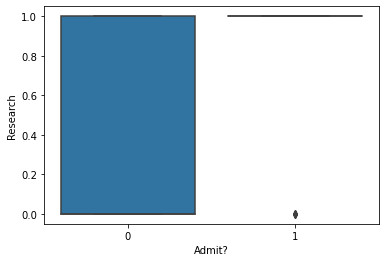

In [17]:
import seaborn as sns
for col in X_train_scaled.columns:
    sns.boxplot(x="Admit?", y = col, data=pd.concat([X_train, y_train], axis = 1 ))
    plt.show()

In [18]:
#looking at our Box Plots for our numerical data, we do not see many outliers. We Do see some in University rating, but as 
#it is only on a scale from 1-5 those high scores may be useful. Since ourdataset is not that large I want to 
#preserve as much of the original data as possible. 

In [19]:
#Checking feature correlations before trying more advanced methods
admission_data_binary.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit?
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.640516
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.671785
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.648336
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.579188
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.547431
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.695317
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.438027
Admit?,0.640516,0.671785,0.648336,0.579188,0.547431,0.695317,0.438027,1.000000


## Calculate and Tabulate Important Features

### Method 1 (2 Points)

In [20]:
#2 points
#We will use repeated RFE with cross-validation to select feature. We use Stratifed K Fold
#as we want to address any class imbalance.
# I want to the most generalizable model so even though 
#slower than other methods it is more robust.

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(n_estimators=500, random_state=42)
min_features_to_select = 1
rf_rfe_cv = RFECV(rfc, step=1, min_features_to_select=min_features_to_select, scoring='roc_auc', 
                  cv=StratifiedKFold(n_splits=5))
rf_rfe_cv.fit(X_train_scaled, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(n_estimators=500, random_state=42),
      scoring='roc_auc')

Optimal number of features : 7


C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


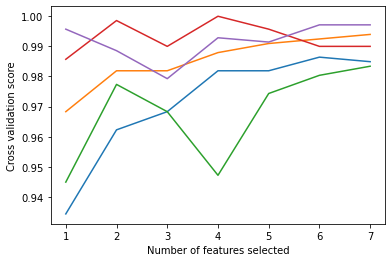

In [21]:

print("Optimal number of features : %d" % rf_rfe_cv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(
    range(min_features_to_select, len(rf_rfe_cv.grid_scores_) + min_features_to_select),
    rf_rfe_cv.grid_scores_,
)
plt.show()

In [22]:
print(rf_rfe_cv.support_)
print(rf_rfe_cv.ranking_)
print(admission_data_binary.columns[rf_rfe_cv.ranking_])

#rf_rfe_cv.cv_results_
#I could not get this to run even after updating

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]
Index(['TOEFL Score', 'TOEFL Score', 'TOEFL Score', 'TOEFL Score',
       'TOEFL Score', 'TOEFL Score', 'TOEFL Score'],
      dtype='object')


#RFE with cross validations ranking shows us that the most improtant feature is the "TOEFL Score".
Our graph show us a few  things such as it appears that we could create a good model with just one feature. 
We also see that there is a performace drop as well as a the curve plateuing. 
Although the suggested optimal number of features is 7, that performance may suggest overfitting on the training data so I
will run more analysis. 

In [23]:
#I will use regular RFE
from sklearn.feature_selection import RFE

rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rf_rfe = RFE(rfc, n_features_to_select=2, step=1)
rf_rfe.fit(X_train_scaled, y_train)

print(rf_rfe.support_)
print(rf_rfe.ranking_)

[ True False False False False  True False]
[1 2 3 4 5 1 6]


In [24]:
admission_data_binary.columns[rf_rfe.ranking_]

Index(['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'TOEFL Score', 'Research'],
      dtype='object')

### Method 2 (2 Points)

In [25]:
# 2 points
#!pip install sklearn-genetic-opt

In [26]:
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution



rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)
#cv = StratifiedKFold(n_splits=5, shuffle=True)
ga_features = GAFeatureSelectionCV(
    estimator=rf_clf,
    cv=5,
    scoring="roc_auc",
    population_size=30,
    generations=10,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

In [28]:
from sklearn_genetic.callbacks import ProgressBar

ga_features.fit(X_train_scaled, y_train, callbacks = ProgressBar())
features = ga_features.best_features_



C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py:201: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use if_available instead.
  warnings.warn(
C:\Users\Matthew\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Matthew\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


  0%|          | 0/11 [00:00<?, ?it/s]

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	30    	0.95733	0.0461246  	0.989459   	0.754094   
1  	60    	0.984397	0.00500745 	0.990221   	0.97209    
2  	60    	0.988965	0.00139267 	0.990593   	0.984473   
3  	60    	0.989733	0.000567423	0.990221   	0.987355   
4  	60    	0.99011 	0.000231666	0.990221   	0.989459   
5  	60    	0.990221	4.44089e-16	0.990221   	0.990221   
6  	60    	0.990221	4.44089e-16	0.990221   	0.990221   
7  	60    	0.990245	9.29838e-05	0.990593   	0.990221   
8  	60    	0.99027 	0.000126716	0.990593   	0.990221   
9  	60    	0.99037 	0.000182617	0.990593   	0.990221   
10 	60    	0.990469	0.000175723	0.990593   	0.990221   


In [29]:
from sklearn.metrics import roc_auc_score
X_test_array = X_test_scaled.values
y_predict_ga = ga_features.predict_proba(X_test_array[:, features])[:,1]
ga_features_roc_auc = roc_auc_score(y_test, y_predict_ga)
ga_features_roc_auc

C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py:201: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use if_available instead.
  warnings.warn(


1.0

In [30]:
print(ga_features.best_features_)
X_train_scaled.columns[ga_features.best_features_]

[ True  True  True  True False  True  True]


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA',
       'Research'],
      dtype='object')

#Our genetic feature selection selected 6 features as the "best". This is also in line with the results from our 
#RFE CV feature selection which shows us that we can create a fantatic model with 5, 6 or 7 features.
#I will go with our genetic feature selection and choose its selected 6 features.


In [31]:
X_train_scaled_best = X_train_scaled.drop(X_train_scaled.columns[[4]],axis=1)
X_train_scaled_best

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research
0,0.457111,0.424662,-0.057308,0.127156,0.139866,0.927613
1,0.102289,0.424662,-0.057308,0.617396,0.361100,-1.078036
2,2.053813,2.085930,1.689221,1.107637,2.250095,0.927613
3,0.279700,-0.572099,-0.057308,-0.363084,-0.030313,0.927613
4,-0.163828,-1.236607,-1.803837,-1.343565,-1.085428,-1.078036
...,...,...,...,...,...,...
315,1.698990,0.756915,1.689221,1.597877,1.994826,0.927613
316,1.078051,0.590789,0.815957,1.107637,1.007783,0.927613
317,-0.962179,-0.405973,-0.930573,-0.853324,-0.625942,0.927613
318,-1.317002,-1.402734,-1.803837,-1.343565,-2.276686,-1.078036


In [32]:
X_test_scaled_best = X_test_scaled.drop(X_test_scaled.columns[[4]],axis=1)
X_test_scaled_best

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research
0,-1.405707,-0.572099,-0.057308,0.127156,-0.796122,0.927613
1,-0.518651,-0.904353,-0.057308,1.107637,0.088813,0.927613
2,2.053813,1.089169,1.689221,0.617396,1.722538,0.927613
3,0.723228,0.092408,0.815957,1.107637,0.803567,0.927613
4,-1.405707,-1.734987,-0.930573,-0.363084,-1.204553,0.927613
...,...,...,...,...,...,...
75,-0.075123,-0.405973,-0.057308,-0.363084,0.241974,-1.078036
76,-0.429945,0.424662,-0.930573,0.127156,-0.098385,-1.078036
77,-1.405707,-1.568860,-1.803837,-1.343565,-0.949284,0.927613
78,1.078051,1.919803,0.815957,1.107637,0.973747,0.927613


# Train

## Algorithm 1 (2 Points)

### Baseline

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)
no_tuning_roc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test_scaled)[:,1])
no_tuning_roc_auc


0.95141065830721

In [34]:
#This is our baseline

from sklearn.model_selection import cross_val_score
#cross_val_score(dtc, X_train, y_train, cv=5, scoring="roc_auc")
#We can use StratifiedKfold for CV instead

In [35]:

from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train,y_train):
    clone_dtc = clone(dtc)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    
    clone_dtc.fit(X_train_folds, y_train_folds)
    y_pred = clone_dtc.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9252336448598131
0.9252336448598131
0.9622641509433962


In [36]:
X_trains_scaled = X_train.values
X_tests_scaled = X_test.values
X_trains = X_train.values
X_tests = X_test.values

### Tuned

In [37]:
#We are going to avoid using our scaled data when we cross validate unless we can use StratifiedKfold

from sklearn.model_selection import GridSearchCV
cv = StratifiedKFold(n_splits=5)
param_grid = {
    'criterion':['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

grid = GridSearchCV(dtc,
                   param_grid=param_grid,
                   cv=cv,
                   verbose=1,
                    n_jobs=-1
                   ) 
grid.fit(X_trains_scaled[:, features],y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\utils\valida

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [38]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
0.946875


In [39]:

dtc_best = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtc_best.fit(X_trains_scaled[:, features], y_train)
tuning_roc_auc = roc_auc_score(y_test, dtc_best.predict_proba(X_tests_scaled[:, features])[:,1])
tuning_roc_auc

0.9855015673981191

#With our tuned model we see a slight improvement on the testing data than our training data.
#We also see an improvment from the baseline model 

## Algorithm 2 (2 Points)

### Baseline

In [40]:
rfc_base = RandomForestClassifier(random_state=42)
rfc_base.fit(X_train_scaled, y_train)
no_tuning_roc_auc_rfc = roc_auc_score(y_test, rfc_base.predict_proba(X_test_scaled)[:,1])
print(no_tuning_roc_auc_rfc)
#print(cross_val_score(rfc_base, X_train, y_train, cv=5, scoring="roc_auc"))
#careful using scaled data when doing cross validation also using vs with class imbalance


0.9972570532915361


In [41]:
type(RandomForestClassifier())

sklearn.ensemble._forest.RandomForestClassifier

### Tuned

In [42]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical, Continuous

In [43]:
n_estimators = Integer(200, 1000)
max_features = Categorical(['auto', 'sqrt'])
max_depth = Integer(10, 110)
min_samples_split = Integer(2, 10)
min_samples_leaf = Integer(1,4)
bootstrap = Categorical([True, False])

In [44]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [45]:
ga_tune = GASearchCV(
    estimator=RandomForestClassifier(random_state=42),
    cv=cv,
    scoring="roc_auc",
    population_size=15,
    generations=20,
    tournament_size=3,
    elitism=True,
    keep_top_k=4,
    crossover_probability=0.9,
    mutation_probability=0.05,
    param_grid=param_grid,
    criteria="max",
    algorithm="eaMuCommaLambda",
    n_jobs=-1)

In [46]:
ga_tune.fit(X_train, y_train, callbacks=ProgressBar())
y_predict_ga = ga_tune.predict(X_test_scaled)
roc_auc_score(y_test, y_predict_ga)

C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py:201: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use if_available instead.
  warnings.warn(


  0%|          | 0/21 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.987422	0.000852513	0.988998   	0.986299   
1  	27    	0.988515	0.000546294	0.988998   	0.987204   
2  	26    	0.988898	0.000419597	0.9893     	0.987807   
3  	27    	0.989199	0.000179875	0.989601   	0.988998   
4  	27    	0.989259	0.000102544	0.9893     	0.988998   
5  	29    	0.98936 	0.000120664	0.989601   	0.9893     
6  	29    	0.989481	0.000147782	0.989601   	0.9893     
7  	28    	0.989601	3.33067e-16	0.989601   	0.989601   
8  	29    	0.989601	3.33067e-16	0.989601   	0.989601   
9  	29    	0.989601	3.33067e-16	0.989601   	0.989601   
10 	29    	0.989601	3.33067e-16	0.989601   	0.989601   
11 	29    	0.989601	3.33067e-16	0.989601   	0.989601   
12 	28    	0.989601	3.33067e-16	0.989601   	0.989601   
13 	28    	0.989601	3.33067e-16	0.989601   	0.989601   
14 	27    	0.989601	3.33067e-16	0.989601   	0.989601   
15 	28    	0.989601	3.33067e-16	0.989601   	0.989601   
16 	27    	0.989601	3.33067e-16	0.989601   	0.98

C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py:201: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use if_available instead.
  warnings.warn(


0.5

In [47]:
rf_ga_feats_tuned = RandomForestClassifier(**ga_tune.best_params_)
rf_ga_feats_tuned.fit(X_trains_scaled[:, features], y_train)

roc_auc_score(y_test, rf_ga_feats_tuned.predict_proba(X_tests_scaled[:, features])[:,1])


C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


1.0

## Algorithm 3 (2 Points)

### Baseline

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrc = LogisticRegression()
lrc.fit(X_train_scaled, y_train)
no_tuning_lrc =  accuracy_score(y_test, lrc.predict(X_test_scaled))
no_tuning_lrc
#We see we have an accuracy of .975 on our baseline Logistic Regression Classification

0.975

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svcbase = SVC(random_state=42)
svcbase.fit(X_train_scaled, y_train)
no_tuning_svc = accuracy_score(y_test, svcbase.predict(X_test_scaled))
no_tuning_svc


0.9625

### Tuned

In [50]:
from sklearn.model_selection import RandomizedSearchCV

SVC_tune= SVC(random_state=42)
param_grid_SVC = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'sigmoid']}
CV_SVC = RandomizedSearchCV(estimator=SVC_tune, param_distributions=param_grid_SVC, cv=2,
                    n_jobs=-1)
CV_SVC.fit(X_trains_scaled[:,features], y_train)

RandomizedSearchCV(cv=2, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01],
                                        'kernel': ['rbf', 'sigmoid']})

In [51]:
print(CV_SVC.best_params_)
print(CV_SVC.best_estimator_)
print(CV_SVC.best_score_)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
SVC(C=1, gamma=0.01, random_state=42)
0.925


In [52]:
SVC_best = SVC(C = 1, gamma = .01, kernel = "rbf", random_state = 42)
SVC_best.fit(X_trains_scaled[:,features], y_train)
tuning_SVC = accuracy_score(y_test, SVC_best.predict(X_tests_scaled[:, features]))
tuning_SVC

0.9

# Create Pipeline for Final Approach
(e.g. processing, feature selction, and best ML algorithm)

## Pipeline  (2 points)

In [70]:
rf_params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500]
}

rf = RandomForestClassifier()
rf_tuned = GridSearchCV(estimator = rf, param_grid = rf_params, 
                          cv = 10, n_jobs = -1)

rf_tuned.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 500]})

In [71]:
from sklearn.pipeline import make_pipeline
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.model_selection import  RepeatedKFold

pipe = make_pipeline(DropCorrelatedFeatures(method='pearson', threshold=0.85),
                     RFECV(RandomForestClassifier(n_estimators=250), step=1, scoring='roc_auc', 
                       cv=RepeatedKFold(n_splits=10, n_repeats=3), n_jobs=-1),
                         RandomForestClassifier(**rf_tuned.best_params_)
                        )

In [72]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('dropcorrelatedfeatures',
                 DropCorrelatedFeatures(threshold=0.85)),
                ('rfecv',
                 RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=None),
                       estimator=RandomForestClassifier(n_estimators=250),
                       n_jobs=-1, scoring='roc_auc')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=90, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=10))])

In [73]:
roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

0.9984326018808778

## Explain/Justify the Steps of the Approach (2 Points)


The RandomForestClassifier was the best of the three algorithms I evaluated. RandomForest is not that sensitive to scale. This is good since I will be cross-validating and scaling the data can introduce bias. I will also use StratifiedKFold to ensure there is not a class imbalance. My analysis using Genetic Feature Selection suggested that 5 features were important for making this prediciton. I used the best featutures to train a Random Forest Classifier and tune the hyperparameners using Genetic Search. 